# Detecting bias in Gender classification

## 1. Import and Visualise the data

In [1]:
!pip install kaggle
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "~/.kaggle/"
os.environ['KAGGLE_USERNAME'] = 'pavithrapmnair'
os.environ['KAGGLE_KEY'] = '5d0de2c4f8c351f3f76541610e80f27d'

In [3]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
'username':"pavithrapmnair" ,
'key':"5d0de2c4f8c351f3f76541610e80f27d"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d abhikjha/utk-face-cropped

 90% 210M/232M [00:01<00:00, 210MB/s]
100% 232M/232M [00:01<00:00, 204MB/s]


In [5]:
!unzip utk-face-cropped.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkcropped/utkcropped/53_0_1_20170116192938845.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_1_20170117181950281.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_1_20170120222553113.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_1_20170120222956787.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_1_20170120223004304.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170104210010763.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170112215433623.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170112221930338.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170116192925824.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170116192934154.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170119205816456.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_3_20170104220848558.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_3_2017010

In [6]:
import numpy as np
import pandas as pd
import os
import cv2

wd = os.getcwd()
path = os.path.join(wd, "utkcropped/utkcropped")
files = os.listdir(path)
size = len(files)
print("Size: ", size)

Size:  23709


In [7]:
import cv2
images = []

for file in files:
    try:
   

        img = cv2.imread(path+'/'+file) # Using 0 to read image in grayscale mode
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        dim = (96, 96)
        img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA) # resize the original image to 60 * 60 * 3

        images.append(img)
    except Exception as ex:
        continue

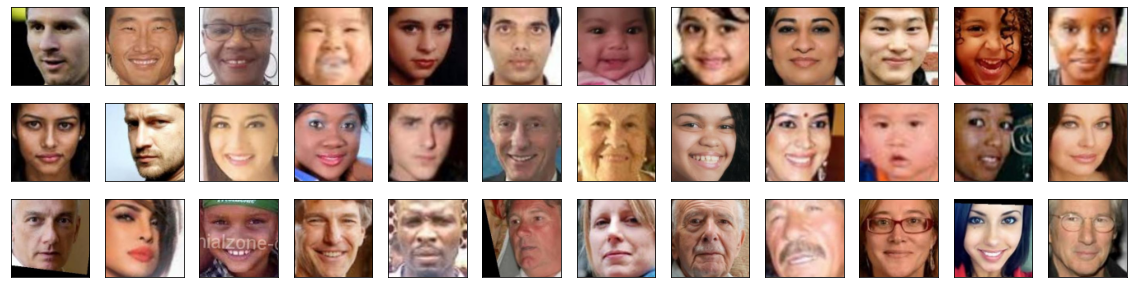

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
def visualize_data():
    images_to_show = 36
    per_row = 12
    fig = plt.figure(figsize=(20,5))
    for i in range(images_to_show):
        pos = (i // per_row, i % per_row)
        ax = plt.subplot2grid((int(images_to_show / per_row), per_row),
                              pos, xticks=[], yticks=[])
        ax.imshow(images[i])
    plt.show()
    fig.savefig('face_demo.png', dpi = 300, bbox_inches='tight')
    
visualize_data()

In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

['50_0_3_20170119203909752.jpg.chip.jpg']
Image shape: (200, 200, 3)


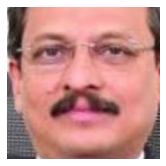

In [10]:
# Visualize random images
plt.figure()
plt.subplot(1, 2, 1)
face_img = view_random_image(path, "")

In the filename the second element represents the gender. '0' indicates male and '1' indicates female.

In [11]:
gender = [i.split('_')[1] for i in files]

values, counts = np.unique(gender, return_counts=True)
print(counts)

[12391 11317     1]


In [12]:
# Finding odd one out so there is a binary gender classification
list_3 = list()
say = 0
for i in gender:
   say=say+1
   if i=="3":
     print(say)
     list_3.append(say)

15217


In [13]:
for elem in list_3:
  gender[elem-1] = "1"

In [14]:
classes = []
for i in gender:
    i = int(i)
    classes.append(i)

In [15]:
from keras.utils.np_utils import to_categorical

In [16]:
categorical_labels = to_categorical(classes, num_classes=2)
categorical_labels[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [17]:
images=[]
i=0
for file in files:
  total=path+'/'+file
  print(total," i:",i)
  i=i+1
  image=cv2.imread(total)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(64,64))
  images.append(image)

Streaming output truncated to the last 5000 lines.
/content/utkcropped/utkcropped/39_0_1_20170117165631399.jpg.chip.jpg  i: 18709
/content/utkcropped/utkcropped/30_1_4_20170117202951902.jpg.chip.jpg  i: 18710
/content/utkcropped/utkcropped/26_0_4_20170108224531895.jpg.chip.jpg  i: 18711
/content/utkcropped/utkcropped/28_0_2_20170116192652371.jpg.chip.jpg  i: 18712
/content/utkcropped/utkcropped/42_1_1_20170113135411027.jpg.chip.jpg  i: 18713
/content/utkcropped/utkcropped/56_0_3_20170119192008015.jpg.chip.jpg  i: 18714
/content/utkcropped/utkcropped/32_0_0_20170116192811043.jpg.chip.jpg  i: 18715
/content/utkcropped/utkcropped/53_1_0_20170105163430701.jpg.chip.jpg  i: 18716
/content/utkcropped/utkcropped/59_0_0_20170111203905144.jpg.chip.jpg  i: 18717
/content/utkcropped/utkcropped/8_0_1_20170110220106378.jpg.chip.jpg  i: 18718
/content/utkcropped/utkcropped/55_0_0_20170117185713024.jpg.chip.jpg  i: 18719
/content/utkcropped/utkcropped/46_1_0_20170104235246210.jpg.chip.jpg  i: 18720
/c

In [18]:
x_data=np.array(images)
x_data.shape

(23709, 64, 64, 3)

In [19]:
x = np.squeeze(x_data)
x = x.astype('float32')
x /= 255
x.shape

(23709, 64, 64, 3)

## Segregation of dataset

In [20]:
from os import path
import shutil

file_path = os.path.join(wd, "utkcropped/utkcropped")
path_classified = os.path.join(wd, "utkcropped/")
for image in os.listdir(file_path):
    if image.endswith('.jpg'):
        age = image.split("_")[0]
        gender = image.split("_")[1]  
        race = image.split("_")[2]

        if not path.isdir(f"Gender_{gender}"):  
            os.mkdir(f"Gender_{gender}")
        
        if not path.isdir(f"Race_{race}"):  
            os.mkdir(f"Race_{race}")
        print(gender)
        print(f"{image}")
        # Move the file to the folder with the object_code name
        shutil.copy(f"{file_path}/{image}", f"{wd}/Race_{race}/{image}")
        shutil.copy(f"{file_path}/{image}", f"{wd}/Gender_{gender}/{image}")

Streaming output truncated to the last 5000 lines.
1
22_1_2_20170116172557623.jpg.chip.jpg
1
14_1_0_20170109214707410.jpg.chip.jpg
1
10_1_1_20170109202938302.jpg.chip.jpg
0
42_0_0_20170109012239137.jpg.chip.jpg
1
37_1_1_20170115235037275.jpg.chip.jpg
1
35_1_1_20170116164941979.jpg.chip.jpg
0
53_0_0_20170109002933938.jpg.chip.jpg
0
6_0_4_20161221192637277.jpg.chip.jpg
1
30_1_0_20170117181400610.jpg.chip.jpg
1
11_1_0_20170109203319557.jpg.chip.jpg
0
31_0_3_20170119195952148.jpg.chip.jpg
0
34_0_3_20170117182805214.jpg.chip.jpg
1
38_1_1_20170116160457906.jpg.chip.jpg
1
38_1_0_20170104002144725.jpg.chip.jpg
1
26_1_3_20170117154744110.jpg.chip.jpg
0
23_0_1_20170117144346825.jpg.chip.jpg
0
5_0_4_20161221200001464.jpg.chip.jpg
0
90_0_3_20170111210252274.jpg.chip.jpg
0
32_0_4_20170117140145171.jpg.chip.jpg
1
35_1_1_20170116223049636.jpg.chip.jpg
0
61_0_1_20170117194601885.jpg.chip.jpg
0
29_0_1_20170117104547721.jpg.chip.jpg
0
26_0_2_20170116180358437.jpg.chip.jpg
1
76_1_2_20170110180413588.jpg.

In [21]:
def file_count(dir_path):
  count = 0
  for path in os.scandir(dir_path):
    if path.is_file():
        count += 1
  print(f'File count of {dir_path}:', count)

In [22]:
file_count('/content/Race_0')
file_count('/content/Race_1')
file_count('/content/Race_2')
file_count('/content/Race_3')
file_count('/content/Race_4')

File count of /content/Race_0: 10078
File count of /content/Race_1: 4526
File count of /content/Race_2: 3434
File count of /content/Race_3: 3975
File count of /content/Race_4: 1692


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_test = train_test_split(x, categorical_labels, test_size=0.2)
X_valid , X_test, y_valid, y_test = train_test_split(X_valid, y_test, test_size=0.5)

print("X_train", X_train.shape)
print("X_valid", X_valid.shape)
print("X_test", X_test.shape)

X_train (18967, 64, 64, 3)
X_valid (2371, 64, 64, 3)
X_test (2371, 64, 64, 3)


In [24]:
# Create TensorBoard callback (functionized because we need to create a new one for each model)
import datetime
import tensorflow as tf

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [25]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [26]:
# Import dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [27]:
IMAGE_SHAPE = (64, 64)
def create_model(model_url, num_classes=10):
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url, trainable=False, name="feature_extraction_layer", input_shape=IMAGE_SHAPE+(3,))               

  # Create our own model
  model = tf.keras.Sequential([
                               feature_extractor_layer,
                               layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model

## Resnet Model training on source dataset

In [28]:
# Create ResNet model
resnet_model = create_model(resnet_url, num_classes=2)

In [29]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 2)                 4098      
                                                                 
Total params: 23,568,898
Trainable params: 4,098
Non-trainable params: 23,564,800
_________________________________________________________________


In [30]:
resnet_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

epochs = 25
batchSize = 100 

hist = resnet_model.fit(X_train, y_train, 
                 epochs=epochs,
                 shuffle=True,
                 batch_size=batchSize, 
                 validation_data=(X_valid, y_valid),
                 verbose=2)

Epoch 1/25
190/190 - 20s - loss: 0.5409 - accuracy: 0.7571 - val_loss: 0.4583 - val_accuracy: 0.7950 - 20s/epoch - 105ms/step
Epoch 2/25
190/190 - 7s - loss: 0.4254 - accuracy: 0.8103 - val_loss: 0.4395 - val_accuracy: 0.8022 - 7s/epoch - 36ms/step
Epoch 3/25
190/190 - 6s - loss: 0.3986 - accuracy: 0.8224 - val_loss: 0.4176 - val_accuracy: 0.8170 - 6s/epoch - 34ms/step
Epoch 4/25
190/190 - 6s - loss: 0.3865 - accuracy: 0.8275 - val_loss: 0.4110 - val_accuracy: 0.8233 - 6s/epoch - 34ms/step
Epoch 5/25
190/190 - 7s - loss: 0.3773 - accuracy: 0.8318 - val_loss: 0.4748 - val_accuracy: 0.7879 - 7s/epoch - 34ms/step
Epoch 6/25
190/190 - 7s - loss: 0.3727 - accuracy: 0.8350 - val_loss: 0.4173 - val_accuracy: 0.8170 - 7s/epoch - 34ms/step
Epoch 7/25
190/190 - 7s - loss: 0.3664 - accuracy: 0.8384 - val_loss: 0.4392 - val_accuracy: 0.8022 - 7s/epoch - 35ms/step
Epoch 8/25
190/190 - 7s - loss: 0.3638 - accuracy: 0.8400 - val_loss: 0.4161 - val_accuracy: 0.8199 - 7s/epoch - 35ms/step
Epoch 9/25
19

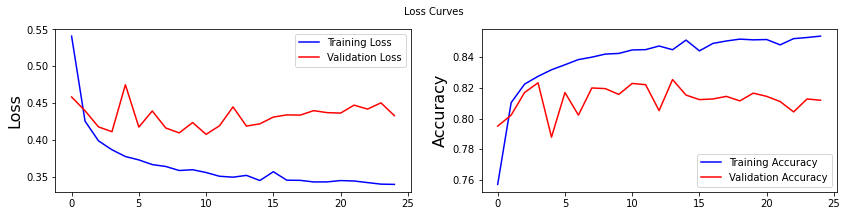

In [31]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Loss Curves', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

75/75 [==============================] - 3s 22ms/step


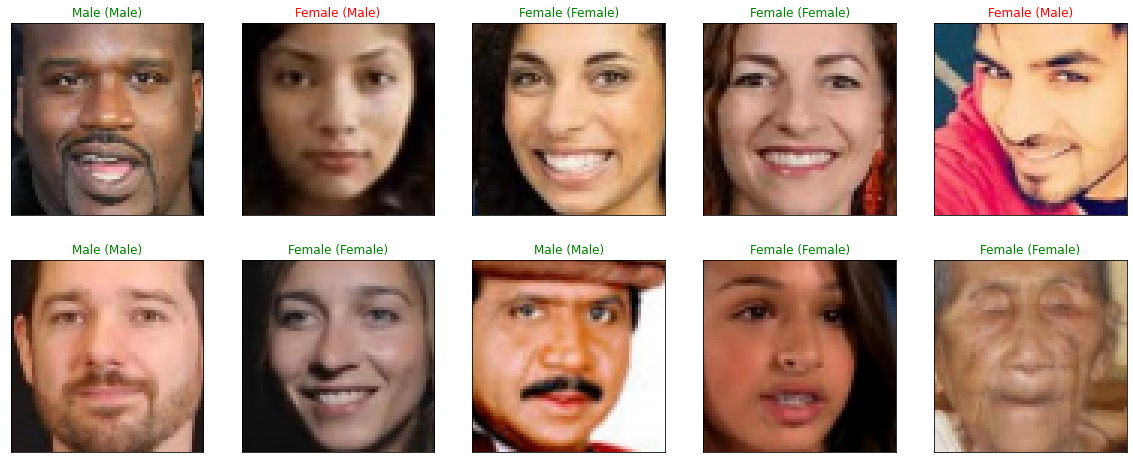

In [32]:
labels =["Male","Female"]
import matplotlib.pyplot as plt

Y = resnet_model.predict(X_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(Y[index])
    true_index = np.argmax(y_test[index])
    
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

## Others Race 4

### Creation of Target Dataset (Others)

In [45]:
path = os.path.join(wd, "Race_4")
files = os.listdir(path)

In [46]:
images=[]
i=0
for file in files:
  total=path+'/'+file
  print(total," i:",i)
  i=i+1
  image=cv2.imread(total)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(64,64))
  images.append(image)

/content/Race_4/20_1_4_20170117192614487.jpg.chip.jpg  i: 0
/content/Race_4/1_1_4_20161221202018329.jpg.chip.jpg  i: 1
/content/Race_4/36_1_4_20170104204341444.jpg.chip.jpg  i: 2
/content/Race_4/4_1_4_20170103210522819.jpg.chip.jpg  i: 3
/content/Race_4/24_1_4_20170104005530664.jpg.chip.jpg  i: 4
/content/Race_4/26_1_4_20170117201650134.jpg.chip.jpg  i: 5
/content/Race_4/2_1_4_20161221192754807.jpg.chip.jpg  i: 6
/content/Race_4/1_1_4_20161221201827921.jpg.chip.jpg  i: 7
/content/Race_4/8_1_4_20170109202334991.jpg.chip.jpg  i: 8
/content/Race_4/28_1_4_20170103235043691.jpg.chip.jpg  i: 9
/content/Race_4/31_0_4_20170116214318093.jpg.chip.jpg  i: 10
/content/Race_4/1_0_4_20170103202331712.jpg.chip.jpg  i: 11
/content/Race_4/26_1_4_20170117154442702.jpg.chip.jpg  i: 12
/content/Race_4/29_0_4_20170103235130284.jpg.chip.jpg  i: 13
/content/Race_4/1_1_4_20161223231311515.jpg.chip.jpg  i: 14
/content/Race_4/24_0_4_20161219192105922.jpg.chip.jpg  i: 15
/content/Race_4/23_1_4_20170117194143181.

In [47]:
x_data=np.array(images)
x_data.shape

(1692, 64, 64, 3)

In [48]:
x = np.squeeze(x_data)
x = x.astype('float32')
x /= 255
x.shape

(1692, 64, 64, 3)

In [49]:
gender = [i.split('_')[1] for i in files]

values, counts = np.unique(gender, return_counts=True)
print(counts)

[760 932]


In [50]:
classes = []
for i in gender:
    i = int(i)
    classes.append(i)

In [51]:
from keras.utils.np_utils import to_categorical

In [52]:
categorical_labels = to_categorical(classes, num_classes=2)
categorical_labels[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### Test train split of target dataset

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, categorical_labels, test_size=0.2)

print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (1353, 64, 64, 3)
X_test (339, 64, 64, 3)


### Training on Target Dataset

In [54]:
resnet_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

epochs = 10
batchSize = 100 

hist = resnet_model.fit(X_train, y_train, 
                 epochs=epochs,
                 shuffle=True,
                 batch_size=batchSize, 
                 validation_data=(X_test, y_test),
                 verbose=2)

Epoch 1/10
14/14 - 4s - loss: 0.4600 - accuracy: 0.8115 - val_loss: 0.5515 - val_accuracy: 0.7965 - 4s/epoch - 259ms/step
Epoch 2/10
14/14 - 1s - loss: 0.3815 - accuracy: 0.8367 - val_loss: 0.4831 - val_accuracy: 0.7994 - 557ms/epoch - 40ms/step
Epoch 3/10
14/14 - 1s - loss: 0.3631 - accuracy: 0.8463 - val_loss: 0.4806 - val_accuracy: 0.8083 - 591ms/epoch - 42ms/step
Epoch 4/10
14/14 - 1s - loss: 0.3321 - accuracy: 0.8633 - val_loss: 0.4822 - val_accuracy: 0.8083 - 547ms/epoch - 39ms/step
Epoch 5/10
14/14 - 1s - loss: 0.3189 - accuracy: 0.8670 - val_loss: 0.4739 - val_accuracy: 0.8083 - 556ms/epoch - 40ms/step
Epoch 6/10
14/14 - 1s - loss: 0.3091 - accuracy: 0.8751 - val_loss: 0.4792 - val_accuracy: 0.8230 - 547ms/epoch - 39ms/step
Epoch 7/10
14/14 - 1s - loss: 0.2949 - accuracy: 0.8817 - val_loss: 0.4760 - val_accuracy: 0.8201 - 554ms/epoch - 40ms/step
Epoch 8/10
14/14 - 1s - loss: 0.2776 - accuracy: 0.8928 - val_loss: 0.4624 - val_accuracy: 0.8024 - 554ms/epoch - 40ms/step
Epoch 9/10

### Testing on Target Dataset (Others)

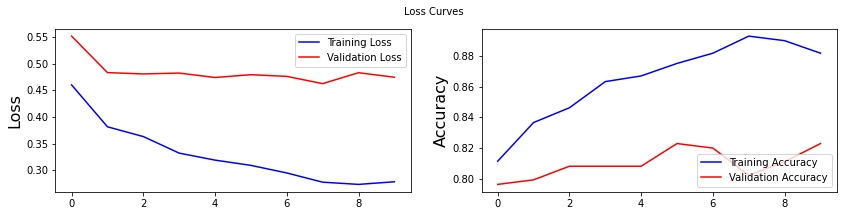

In [55]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Loss Curves', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

11/11 [==============================] - 1s 66ms/step


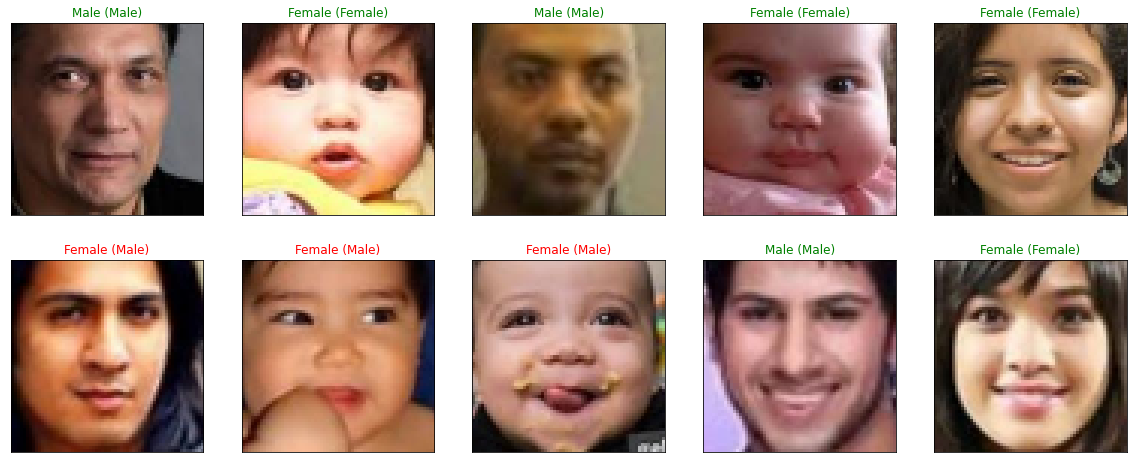

In [56]:
labels =["Male","Female"]
import matplotlib.pyplot as plt

Y = resnet_model.predict(X_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(Y[index])
    true_index = np.argmax(y_test[index])
    
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()